In [1]:
import pandas as pd

# Load telemetry data
telemetry_data = pd.read_csv("../data/telemetry_data.csv")
power_data = pd.read_csv("../data/power_data.csv")

# Display the first few rows of each DataFrame
print("Telemetry Data:")
print(telemetry_data.head())

print("\nPower Data:")
print(power_data.head())




Telemetry Data:
      timestamp  cpu_usage  memory_usage  nic_usage  tdp
0  1.720976e+09        2.4          74.0          0    0
1  1.720976e+09        8.4          74.0          0    0
2  1.720976e+09        5.9          73.4          0    0
3  1.720976e+09        9.0          73.3          0    0
4  1.720976e+09       11.2          73.7          0    0

Power Data:
      timestamp  cpu_power  memory_power  nic_power  tdp_power
0  1.720976e+09          0             0          0          0
1  1.720976e+09          0             0          0          0
2  1.720976e+09          0             0          0          0
3  1.720976e+09          0             0          0          0
4  1.720976e+09          0             0          0          0


Columns in power_data: Index(['timestamp', 'cpu_power', 'memory_power', 'nic_power', 'tdp_power'], dtype='object')


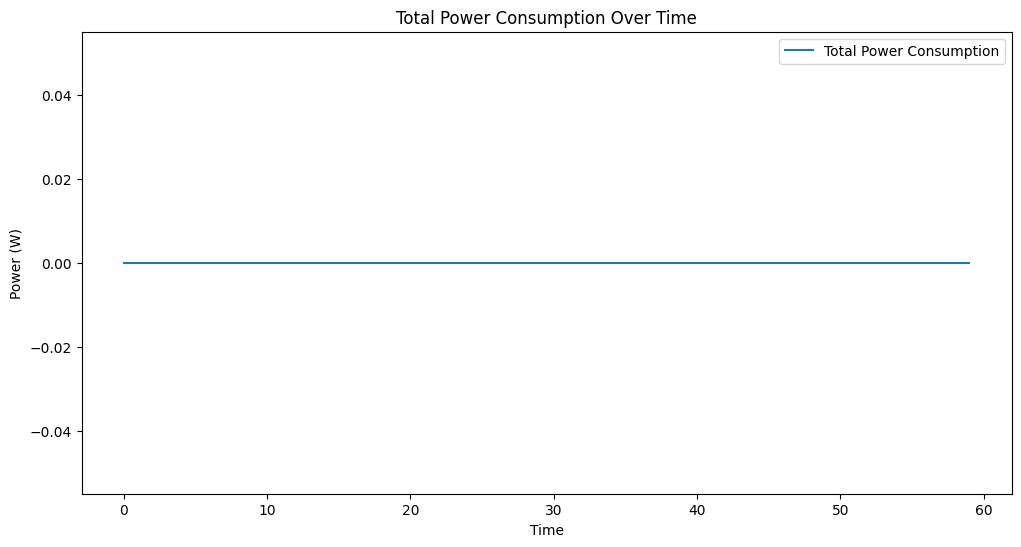

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the power data
power_data = pd.read_csv("../data/power_data.csv")

# Print the columns to check available data
print("Columns in power_data:", power_data.columns)

# Check if necessary columns exist and create total_power if not present
if 'cpu_power' in power_data.columns and 'memory_power' in power_data.columns and 'nic_power' in power_data.columns and 'tdp_power' in power_data.columns:
    power_data['total_power'] = (power_data['cpu_power'] + 
                                  power_data['memory_power'] + 
                                  power_data['nic_power'] + 
                                  power_data['tdp_power'])

    plt.figure(figsize=(12, 6))
    plt.plot(power_data.index, power_data['total_power'], label='Total Power Consumption')
    plt.xlabel('Time')
    plt.ylabel('Power (W)')
    plt.title('Total Power Consumption Over Time')
    plt.legend()
    plt.show()
else:
    print("One or more required power columns are missing.")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import time

# Function to load power data
def load_power_data():
    return pd.read_csv("../data/power_data.csv")

# Initialize plot
plt.ion()  # Interactive mode on
fig, ax = plt.subplots(figsize=(12, 6))
line, = ax.plot([], [], label='Total Power Consumption')
ax.set_xlabel('Time')
ax.set_ylabel('Power (W)')
ax.set_title('Real-Time Total Power Consumption')
ax.legend()

# Set initial limits
ax.set_xlim(0, 100)  # Adjust as needed
ax.set_ylim(0, 100)  # Adjust as needed

# Lists to hold data for plotting
x_data = []
y_data = []

try:
    while True:
        # Load the latest power data
        power_data = load_power_data()

        # Check for necessary columns
        if all(col in power_data.columns for col in ['cpu_power', 'memory_power', 'nic_power', 'tdp_power']):
            power_data['total_power'] = (power_data['cpu_power'] + 
                                          power_data['memory_power'] + 
                                          power_data['nic_power'] + 
                                          power_data['tdp_power'])

            # Append data for plotting
            current_time = len(x_data)  # Use index as time
            x_data.append(current_time)
            y_data.append(power_data['total_power'].iloc[-1])  # Latest total power

            # Update plot
            line.set_xdata(x_data)
            line.set_ydata(y_data)
            ax.relim()  # Recalculate limits
            ax.autoscale_view()  # Autoscale
            plt.draw()
            plt.pause(1)  # Pause for a second before the next update
        else:
            print("One or more required power columns are missing.")

except KeyboardInterrupt:
    print("Real-time monitoring stopped.")

finally:
    plt.ioff()  # Turn interactive mode off
    plt.show()  # Show final plot
